# Black-Scholes derivation

- The Black–Scholes model tells us that if there are no arbitrage opportunities in the market and stock prices fluctuate randomly, we can calculate the "fair value" of a European option.
- European options are the most common type of options. Profits or losses are settled only after the trading parties agree on an expiration date.
- American options are more flexible and therefore generally more expensive than European options. This is especially true when stock prices fluctuate significantly or dividends are paid, making early exercise more cost-effective.
- The Black–Scholes model only applies to European options and can be solved using closed-form solutions. American options do not, requiring other methods.
- This model allows us to mathematically convert the randomness of future stock price fluctuations into the fair value of an option today (more intuitive).

Both Black-Scholes calls and puts are derived from call-call parity.
$$C - P = S - Ke^{-r(T-t)}$$
- Put options
$$P = Ke^{-r(T-t)} \Phi(-d_2) - S \Phi(-d_1)$$
- Call options
$$C = S \Phi(d_1) - Ke^{-r(T-t)} \Phi(d_2)$$
- where
$$d_1 = \frac{\ln(S/K) + (r + 0.5\sigma^2)(T-t)}{\sigma\sqrt{T-t}}, \quad
d_2 = d_1 - \sigma \sqrt{T-t}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [17]:
# Define call option function
def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

In [16]:
# Define put option function 
def bs_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

### One Simple example

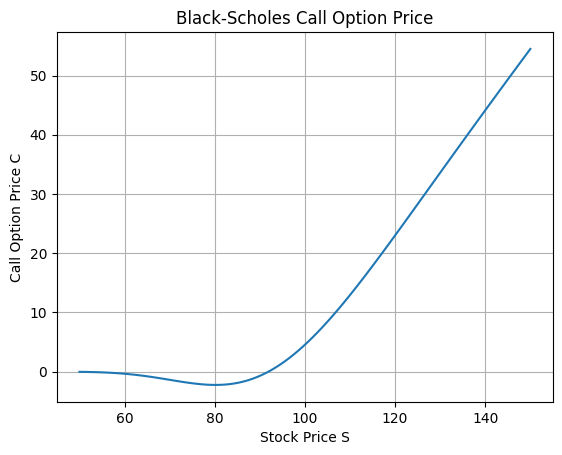

In [9]:
# Draw Black-Scholes Call Option Price
S = np.linspace(50, 150, 100)
K = 100
T = 1
r = 0.05
sigma = 0.2

prices = [bs_call(s, K, T, r, sigma) for s in S]

plt.plot(S, prices)
plt.xlabel("Stock Price S")
plt.ylabel("Call Option Price C")
plt.title("Black-Scholes Call Option Price")
plt.grid(True)
plt.show()

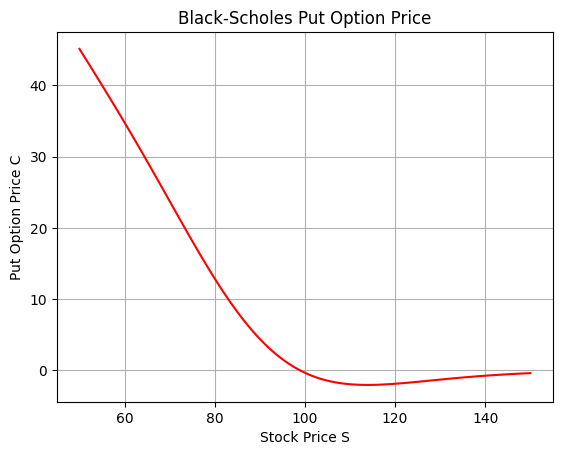

In [15]:
# Draw Black-Scholes Call Option Price
S = np.linspace(50, 150, 100)
K = 100
T = 1
r = 0.05
sigma = 0.2

prices = [bs_put(s, K, T, r, sigma) for s in S]

plt.plot(S, prices, 'red')
plt.xlabel("Stock Price S")
plt.ylabel("Put Option Price C")
plt.title("Black-Scholes Put Option Price")
plt.grid(True)
plt.show()